In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_json('../output/scalabilityResult.jsonl', lines=True)
df # AverageEdges is not avg. degree but edge/node ratio

,Nodes,AverageEdges,ExperimentSeed,EncodingDistance,TotalRuntime
0,64,2,1,1,4.376848
1,64,2,2,1,3.469649
2,64,2,3,1,3.625163
3,64,2,4,1,3.585104
4,64,2,5,1,3.702737
...,...,...,...,...,...
360,16384,1,1,3,15357.771062
361,16384,1,2,3,14898.384588
362,16384,1,3,3,14863.930215
363,16384,1,4,3,14852.799858


In [3]:
filtered_df = df[df.Nodes == 4096][df.AverageEdges > 1]
avg_edges_grp = filtered_df.groupby(['AverageEdges', 'EncodingDistance'], as_index=False)
avg_edges_df = avg_edges_grp.agg({'TotalRuntime': ['mean', 'std']})
avg_edges_df.columns = ['{}{}'.format(a, b.capitalize()) for (a, b) in avg_edges_df.columns]
avg_edges_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,AverageEdges,EncodingDistance,TotalRuntimeMean,TotalRuntimeStd
0,2,1,682.098059,9.274112
1,2,2,687.976085,9.255366
2,2,3,731.842422,4.116914
3,4,1,686.235101,8.189304
4,4,2,737.464001,15.356253
5,4,3,804.266780,13.753387
6,8,1,670.165350,6.118942
7,8,2,757.494206,10.216483
8,8,3,990.417753,11.402378
9,16,1,685.425078,9.090487


In [4]:
filtered_df = df[df.AverageEdges == 4]
nodes_grp = filtered_df.groupby(['Nodes', 'EncodingDistance'], as_index=False)
nodes_df = nodes_grp.agg({'TotalRuntime': ['mean', 'std']})
nodes_df.columns = ['{}{}'.format(a, b.capitalize()) for (a, b) in nodes_df.columns]
nodes_df


,Nodes,EncodingDistance,TotalRuntimeMean,TotalRuntimeStd
0,64,1,3.713925,0.273957
1,64,2,3.783941,0.348232
2,64,3,3.788189,0.263568
3,256,1,9.820339,0.393061
4,256,2,9.970017,0.207404
5,256,3,10.543535,0.351469
6,1024,1,48.380801,1.078263
7,1024,2,49.747872,0.559258
8,1024,3,55.529108,0.347028
9,4096,1,686.235101,8.189304


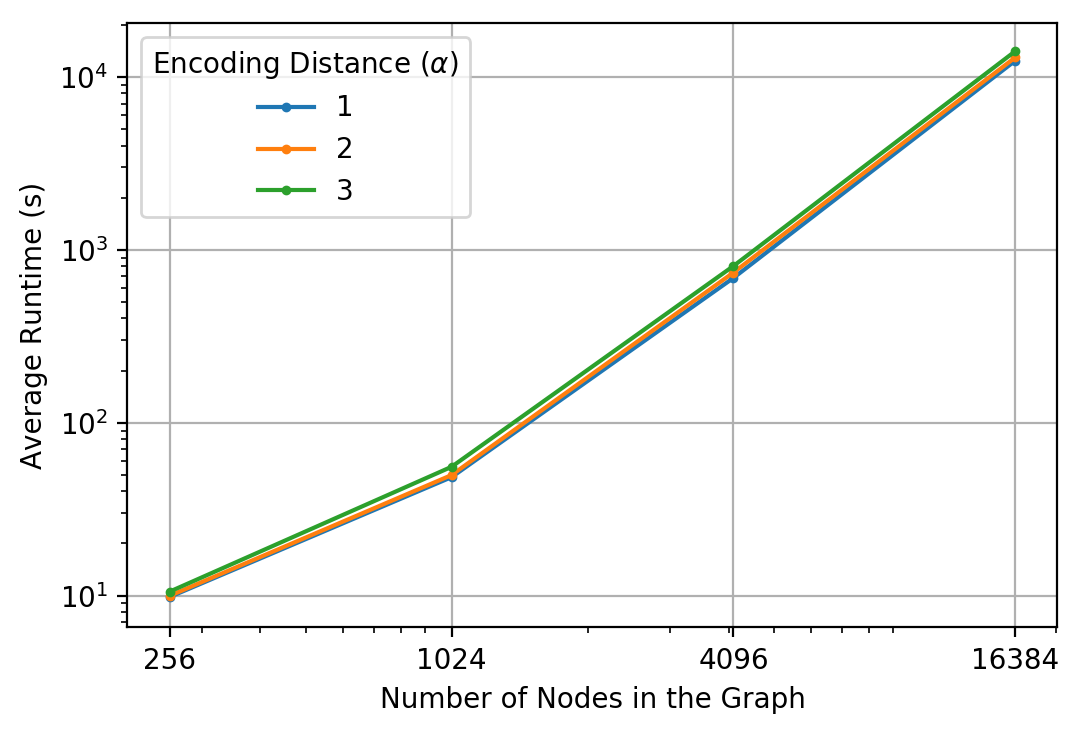

In [12]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
#plt.title('Average Runtime vs. Nodes in Graph')
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basex=10)

ENCODING_DISTANCE_STRING = 'Encoding Distance ($\\alpha$)'

nodes_large_df = nodes_df[nodes_df.Nodes >= 256]
nodes_large_df.columns = ['Nodes', ENCODING_DISTANCE_STRING, 'TotalRuntimeMean', 'TotalRuntimeStd']
node_values = nodes_large_df.Nodes.unique()
nodes_large_df.groupby(['Nodes', ENCODING_DISTANCE_STRING]).first().unstack().plot(y='TotalRuntimeMean',
                                                                       legend=True, 
                                                                       ax=ax, 
                                                                       xticks=node_values,
                                                                       yerr='TotalRuntimeStd',
                                                                       marker='.',
                                                                       markersize=5)
ax.set_xlabel('Number of Nodes in the Graph')
ax.set_xticklabels([str(n) for n in node_values])
ax.set_ylabel('Average Runtime (s)')
plt.grid()
fig.savefig('../output/ScalabilityNodesRuntime.pdf')

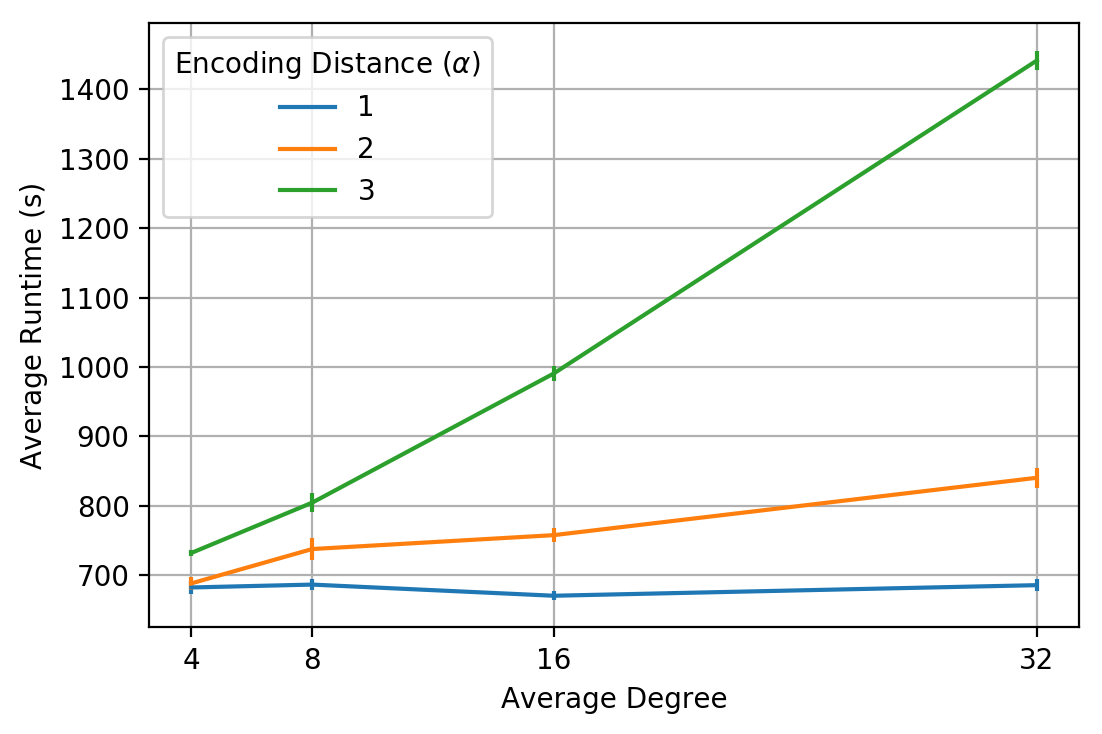

In [16]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
#plt.title('Average Runtime vs. Average Degree')
#ax.set_xscale('log', basex=2)
#ax.set_yscale('log', basex=10)

degree_values = avg_edges_df.AverageEdges.unique()
avg_edges_df.columns = ['AverageEdges', ENCODING_DISTANCE_STRING, 'TotalRuntimeMean', 'TotalRuntimeStd']
avg_edges_df.groupby(['AverageEdges', ENCODING_DISTANCE_STRING]).first().unstack().plot(y='TotalRuntimeMean',
                                                                                  legend=True, 
                                                                                  ax=ax, 
                                                                                  xticks=degree_values,
                                                                                  yerr='TotalRuntimeStd')
ax.set_xlabel('Average Degree')
ax.set_xticklabels([str(d * 2) for d in degree_values])
ax.set_ylabel('Average Runtime (s)')
plt.grid()
fig.savefig('../output/ScalabilityEdgesRuntime.pdf')